In [1]:
#import all the required modulus 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline


In [3]:
#uplode the data file
df= pd.read_csv("C:/Users/Asus/Downloads/house_data.csv")
df.head()


,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [4]:
df.shape

(5000, 7)

In [5]:
# 5000 samples 7 columns 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

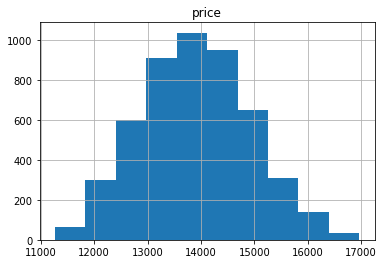

In [6]:
# visualize the price data
df.hist("price")

In [8]:
# Check missing values
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [11]:
# Data Normalization: features of a dataset are transformed to have a consistent scale.
df= df.iloc[:,1:]
df_norm= (df-df.mean())/ df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [13]:
# select x and y lables
X=df_norm.iloc[:,:5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [14]:
Y=df_norm.iloc[:,-1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [15]:
# putting X and Y values in an array 
X_arr=X.values
Y_arr=Y.values

In [17]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_arr,Y_arr,test_size=0.01,shuffle=True, random_state=1)

In [19]:
#create the model
def get_model():
    model = Sequential([
        Dense(10, input_shape=(5,), activation='relu'),
        Dense(20, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

# Create the model
model = get_model()

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [21]:
# model training
model= get_model()

# recording prediction before the training the model
preds_on_untrained=model.predict(X_test)

In [22]:
# train model and store in the object history
history= model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs= 10000)


Epoch 1/10000
155/155 [==============================] - 1s 3ms/step - loss: 0.8873 - val_loss: 0.7030
Epoch 2/10000
155/155 [==============================] - 0s 2ms/step - loss: 0.8828 - val_loss: 0.6989
Epoch 3/10000
155/155 [==============================] - 0s 2ms/step - loss: 0.8785 - val_loss: 0.6949
Epoch 4/10000
155/155 [==============================] - 0s 1ms/step - loss: 0.8743 - val_loss: 0.6910
Epoch 5/10000
155/155 [==============================] - 0s 1ms/step - loss: 0.8700 - val_loss: 0.6870
Epoch 6/10000
155/155 [==============================] - 0s 2ms/step - loss: 0.8659 - val_loss: 0.6832
Epoch 7/10000
155/155 [==============================] - 0s 2ms/step - loss: 0.8618 - val_loss: 0.6795
Epoch 8/10000
155/155 [==============================] - 0s 1ms/step - loss: 0.8578 - val_loss: 0.6757
Epoch 9/10000
155/155 [==============================] - 0s 2ms/step - loss: 0.8538 - val_loss: 0.6720
Epoch 10/10000
155/155 [==============================] - 0s 1ms/step - l

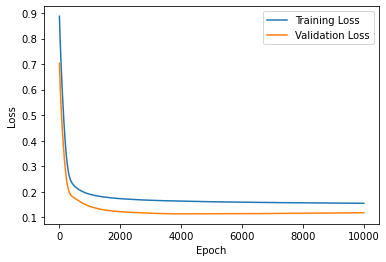

In [24]:
#plot training and validation loss
def plot_loss(history):
    # Extract the training loss and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the training and validation loss
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [26]:
#predictions
preds_on_trained = model.predict(X_test)

In [36]:
#convert label value
Y_mean= df['price'].mean()
Y_std= df['price'].std()

def convert_lable_actual(pred):
    return int(pred*Y_std+ Y_mean)
print(convert_lable_actual(0.350088))

14263


In [38]:
#price predition
price_on_untrained= [convert_lable_actual(Y) for Y in preds_on_untrained ]
price_on_trained= [convert_lable_actual(Y) for Y in preds_on_trained ]
price_Y_test= [convert_lable_actual(Y) for Y in Y_test]

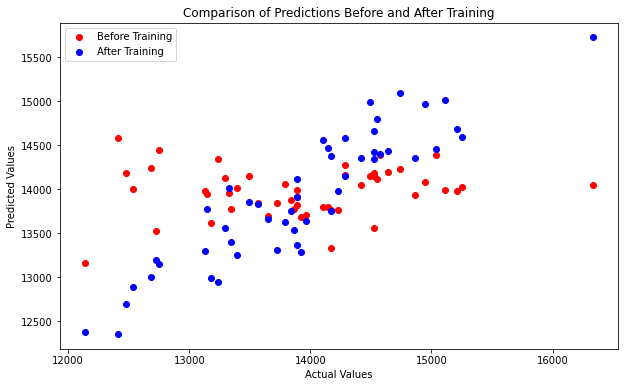

In [39]:
# comparing the prediction 
compare_predictions(price_on_untrained, price_on_trained, price_Y_test)